# This file was created to plot the focal lengths of an electron moving transversely through the simulated wakefield (the OSIRIS 1e15 fields).
### Here, we assume that in the region which the electrons move through the wake, the wake can be modeled as having a spherical shape. (As you'll see below, this may not be correct.)

In [4]:
import numpy as np
import math as m
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import pdb
import time
import progressbar
import include.simulations.useQuasi3D as sim

#comment out this if you don't care about font style and want the code to run faster
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

LoadError: ArgumentError: Package numpy not found in current path.
- Run `import Pkg; Pkg.add("numpy")` to install the numpy package.

### Marisa found the focal length formaula to be 
$$ f(y_0) = \frac{p^2}{2\gamma mkr_b}\left( 1-\left(\frac{y_0}{r_b}\right)^2 \right)^{-1/2} $$

### The formula for an electron's focal length moving transversely through a spherical wake is complicated (see my thesis), but for the case where the electron moves through the center of the wake, it's focal length is  
$$ f(y_0) = \frac{p^2}{\sqrt{2}\gamma mkr_b}\left( 1-\left(\frac{y_0}{r_b}\right)^2 \right)^{-1/2} $$

In [15]:
P = 110 
Vx = 0.99996
K = 0.468 
Rb_max = 0.65

f0 = P*Vx/(2*K*Rb_max) #constant in front of y0/rb term in Marisa's EQ

f1 = P*Vx/(K*Rb_max) #constant in front of y0/rb term in my EQ

#c/wp to mm
unit_conversion = 0.167

#Marisa's eq
def old_f(y):
    
    f = f0/(np.sqrt(1-(y)**2))
    
    return f
    
#spherical focal eq
def new_f(y):
    
    f = f1/(np.sqrt(2 - 2*(y)**2))
    
    return f
    
print(f0*unit_conversion, f1*unit_conversion)

print(old_f(0.1), new_f(0.1))

30.192743589743586 60.38548717948717
181.70568295878726 256.9706412005827


In [2]:
heights = np.array([0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.64])

measured_f = np.array([168,170,172,176,179,182,189,199,208,223,245,279,340,456])*unit_conversion

LoadError: UndefVarError: np not defined

In [17]:
heights = np.divide(heights, Rb_max)

new_theory = new_f(heights)*unit_conversion
old_theory = old_f(heights)*unit_conversion

#old_theory = old_theory/Rb_max

#print(heights)
#print(old_theory)
#print(new_theory)

[0.         0.07692308 0.15384615 0.23076923 0.30769231 0.38461538
 0.46153846 0.53846154 0.61538462 0.69230769 0.76923077 0.84615385
 0.92307692 0.98461538]
[ 30.19274359  30.28246962  30.55652471  31.03029753  31.7322024
  32.70880556  34.03455767  35.83070126  38.30463087  41.84124465
  47.25212952  56.65331308  78.50113333 172.79098498]
[ 42.69898747  42.82587924  43.21345166  43.88346761  44.876111
  46.25723643  48.13213304  50.67226368  54.17092848  59.17245566
  66.82460242  80.11988371 111.01736742 244.36335441]


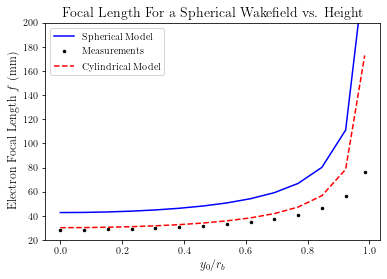

In [20]:

plt.xlabel(r"$y_0/r_b$", size = 12) 
plt.ylabel(r"Electron Focal Length $f$ (mm)", size = 12)
plt.title("Focal Length For a Spherical Wakefield vs. Height", size = 14)
plt.ylim(20,200)
plt.plot(heights, new_theory, '-b', lw = 1.5, label = r'Spherical Model')
plt.plot(heights, measured_f, 'ok', markersize = 2.5, label = "Measurements")
plt.plot(heights, old_theory, '--r', label = "Cylindrical Model")
plt.legend()
plt.savefig("new-focal-test.png", dpi=300)